In [2]:
# !/usr/bin/env python

# [Future imports]
# "print" function compatibility between Python 2.x and 3.x
from __future__ import print_function
# Use Python 3.x "/" for division in Pyhton 2.x
from __future__ import division

# General Python
import sys
import os
sys.path.append('./')
# Data structures
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
dpi = 200
mpl.rc("savefig", dpi=dpi)
%matplotlib inline
from scipy import stats
from scipy import interpolate

import seaborn as sns
import random
from collections import Counter
import matplotlib as mpl

import pandas as pd

import timeit


In [3]:
# this notebook is just to do some simple simulations to see how many
# wells we would need to sequence to see a given fraction of a mutant library

# let's start by making an array of numbers from 0 to 525 (each of these will represent\
# a residue in PafA for this simulation)
mutA = np.arange(0,541)


In [4]:
# let's simulate picking randomly from this list
# let's see the number of mutants that we get back if we pick between 1 and 1000 times!

# create empty lists to hold the number of mutants we get and the number of draws we made
numMutants,numDraws = [],[]

# make an array of 1000 numbers representing the number of draws we will do
rangeDraws = np.arange(1,5000)

# now simulate drawing from 1 to 1000 wells here
for a in rangeDraws:
    # for each draw, let's create an empty list to hold the mutants we get out
    chosenMut = []
    # let's draw the number of times we said we would
    for b in range(0,a):
        # choose a mutant at random and add it to the list
        chosenMut.append(random.choice(mutA))
    # now let's see how many unique mutants we have and add that number to a list
    numMutants.append(len(set(chosenMut)))
    # add this draw number to a list
    numDraws.append(a)
    

Text(0, 0.5, 'number of unique mutants recovered')

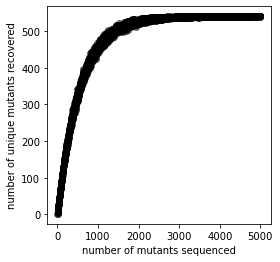

In [5]:
# now let's make a plot of this!

# tell python we want to make a figure and what size we want to make it
fig = plt.figure(figsize=(4,4))

# now create an axis to hold the data - you can make facets if you want too
ax = fig.add_subplot(111)

# make the plot - x data is first, y data is second, rest is just stuff to say what the 
# data points should look like
ax.errorbar(numDraws,numMutants,fmt='-o',color='k',alpha=0.5)
# label the x axis
ax.set_xlabel('number of mutants sequenced')
# label the y axis
ax.set_ylabel('number of unique mutants recovered')

# save the figure - always save a png for presentations and an eps file
# because polly likes to have editable vector graphics
# fig.savefig('RecoveredMutantsVsNumberWellsSequenced.png')
# fig.savefig('RecoveredMutantsVsNumberWellsSequenced.eps')

# First, let's look to see how many of 48 mutants we get from 48 draws

<ipython-input-6-96542367fb64>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


Text(0.5, 1.0, 'Recovered mutants: 48 desired / 96 sequenced (100% efficiency)')

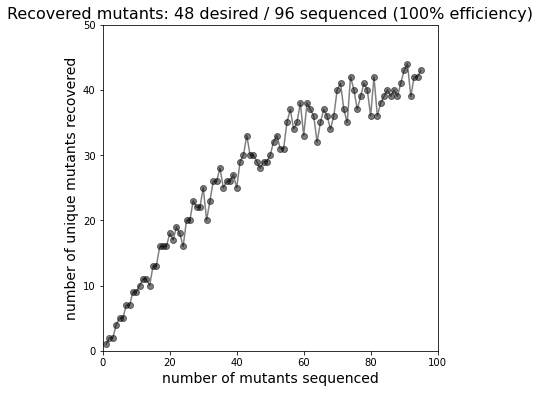

In [6]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 48
numWellsSequenced = 96


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced)

for a in rangeDraws:
    chosenMut = []
    for b in range(0,a):
        chosenMut.append(random.choice(mutA))
    numMutants.append(len(set(chosenMut)))
    numDraws.append(a)


fig = plt.figure(figsize=(6,6))
plt.xlim(right=100)
plt.ylim(top=50)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,numMutants,fmt='-o',color='k',alpha=0.5)
ax.set_xlabel('number of mutants sequenced', fontsize=14)
ax.set_ylabel('number of unique mutants recovered', fontsize=14)
ax.set_title('Recovered mutants: '+str(numMutsWanted)+' desired / '+str(numWellsSequenced)+' sequenced (100% efficiency)', fontsize=16)
# now let's save the figure where we put the information about what we did in the filename
# fig.savefig('RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced.png')
# fig.savefig('RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced.eps')

# Let's modify to incorporate the fact that we only get a single mutant some fraction of the time.

<ipython-input-7-4dc93d7a3fe1>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


Text(0, 0.5, 'number of unique mutants recovered')

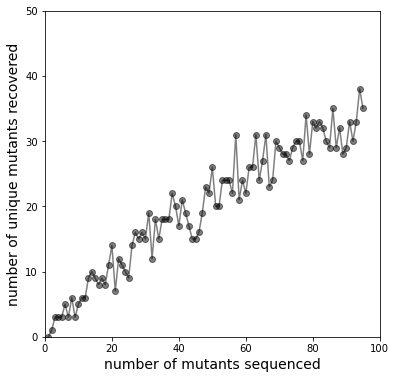

In [7]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 48
numWellsSequenced = 96
percentA = np.arange(0,100)

# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced)

for a in rangeDraws:
    chosenMut = []
    for b in range(0,a):
        # let's simulate a step where we only get a mutant 60 percent of the time!
        successPercent = random.choice(percentA)
        if successPercent <= 60:
            chosenMut.append(random.choice(mutA))
        else:
            pass
    numMutants.append(len(set(chosenMut)))
    numDraws.append(a)

fig = plt.figure(figsize=(6,6))
plt.xlim(right=100)
plt.ylim(top=50)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,numMutants,fmt='-o',color='k',alpha=0.5)
ax.set_xlabel('number of mutants sequenced', fontsize=14)
ax.set_ylabel('number of unique mutants recovered', fontsize=14)
# ax.set_title('Recovered mutants: '+str(numMutsWanted)+' desired / '+str(numWellsSequenced)+' sequenced (60% efficiency)', fontsize=16)
# # now let's save the figure where we put the information about what we did in the filename
# fig.savefig('RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced_60PercentMutant.png')
# fig.savefig('RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced_60PercentMutant.eps')

##Try to create a plot showing different efficiencies

In [7]:
start = timeit.default_timer()

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 500
efficiency=25
percentA = np.arange(0,100)

# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced+1,1)

#how many times to run the simulation
numReps=1000

allMutants25=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants25.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants25]
allMean=[np.mean(k) for k in zip(*arrays)]


efficiency=50
percentA = np.arange(0,100)


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

allMutants50=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants50.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants50]
allMean=[np.mean(k) for k in zip(*arrays)]


efficiency=75
percentA = np.arange(0,100)


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)


allMutants75=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants75.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants75]
allMean=[np.mean(k) for k in zip(*arrays)]

efficiency=10
percentA = np.arange(0,100)


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

allMutants10=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants10.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants10]
allMean=[np.mean(k) for k in zip(*arrays)]

###################################################################################################3

efficiency=100
percentA = np.arange(0,100)


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

allMutants100=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants100.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants100]
allMean=[np.mean(k) for k in zip(*arrays)]


stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  615.146266981


In [8]:
start = timeit.default_timer()

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 500
efficiency=25
percentA = np.arange(0,100)

# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced+1,1)

#how many times to run the simulation
numReps=10

allMutants25=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants25.append(numMutants)
    


stop = timeit.default_timer()

print('Time: ', stop - start)  
    

Time:  1.0481954439892434


In [9]:
unique_mutants, counts = np.unique(np.random.randint(0, 50, 130), return_counts=True)

In [10]:
from tqdm import tqdm

## 1. Simulate libraries of 50, 500, 5000 mutants, at single mutant frequencies of 0.1-1 (Fig 4A)

In [165]:
numReps=100
successPercents=[0.1,0.25,0.5,0.75,1]
num_mutants=[50,500,5000]
num_draws=[500,5000,50000]
sim_results = []

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = 10*mutant_count
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        for i in rangeDraws:

            #Make numpy array containing random percents
            #make number of arrays (equal to number of reps) of length equal to numsber of draws
            successPercent = np.random.randint(1, 101, (numReps, i), dtype=int) 

            target_mutants = successPercent<(percent*100)


            unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=False).tolist() for num_mutants in np.sum(target_mutants, 1).tolist()]
            num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

            output_results = {'percent': percent,
                              'target_mutant_count': mutant_count,
                              'num_draws': i, 
                              'median_unique_mutants': np.median(num_unique_mutants), 
                              'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                              'upper_CI':np.quantile(num_unique_mutants, 0.975)
                             }
            #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
            sim_results.append(output_results)

100%|██████████| 5/5 [7:18:04<00:00, 5256.90s/it]  


In [166]:
sim_results_df=pd.DataFrame(sim_results)

In [178]:

#export simulation results for 100 replicates to load again later
#sim_results_df.to_csv('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies_100reps.csv')

In [22]:
sim_results_df=pd.read_csv('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies_100reps.csv')

### Table S5 data, expected mutant yields from picking simulations

In [121]:
successPercents=[0.1,0.25,0.5,0.75,1]
num_mutants=[50,500,5000]

#number of mutants desired, as a fraction of total
yieldCutoff=0.90

#make lists to store results
targetMutL=[]
singlesFreqL=[]
drawsMedL=[]
drawsUpperL=[]
drawsLowerL=[]
drawsRangeL=[]

for i in num_mutants:
    
    for j in successPercents:
        #select entries in dataframe from number of desired mutants and specified success percents
        tempDF=sim_results_df.loc[(sim_results_df['target_mutant_count']==i) & (sim_results_df['percent']==j)]
        
        targetMutL.append(i)
        singlesFreqL.append(j)
        
        #get number of draws when median number of unique mutants reaches yield cutoff
        a=tempDF.loc[(tempDF['median_unique_mutants']>=(yieldCutoff*i))]
        if a.empty == True:
            drawsMed='>'+str(tempDF['num_draws'].max())
        else:
            drawsMed=a.loc[a['median_unique_mutants'].idxmin()].num_draws
        drawsMedL.append(drawsMed)
        
        #get number of draws when yield cutoff first met in upperCI 
        b=tempDF.loc[(tempDF['upper_CI']>=(yieldCutoff*i))]
        if b.empty == True:
            drawsUpper='>'+str(tempDF['num_draws'].max())
        else:
            drawsUpper=int(b.loc[b['upper_CI'].idxmin()].num_draws)
        drawsUpperL.append(drawsUpper)
        
        #get number of draws when yield cutoff last met in lowerCI
        c=tempDF.loc[(tempDF['lower_CI']>=(yieldCutoff*i))]
        if c.empty == True:
            drawsLower='>'+str(tempDF['num_draws'].max())
        else:
            drawsLower=int(c.loc[c['lower_CI'].idxmax()].num_draws)
        drawsLowerL.append(drawsLower)
        
        #create formatted range as an additional table column
        drawsRangeL.append(str(drawsUpper)+"-"+str(drawsLower))

        
#create new DF and add stats
tableDF=pd.DataFrame(list(zip(targetMutL, singlesFreqL,drawsMedL,drawsUpperL,drawsLowerL,drawsRangeL)),
               columns =['number_desired', 'singleMutFreq','median_draws','upperCI_draws','lowerCI_draws','range_draws'])

#export DF
tableDF.to_csv('/Users/mja/Appel_MutSequencing/2021_simulations/TableS5_simulations_with_100reps.csv', index=False)


In [48]:
sim_results_df.loc[(sim_results_df['target_mutant_count']==50.0)]




,Unnamed: 0,percent,target_mutant_count,num_draws,median_unique_mutants,lower_CI,upper_CI
0,0,0.1,50,1,0.0,0.0,1.000
1,1,0.1,50,2,0.0,0.0,1.000
2,2,0.1,50,3,0.0,0.0,1.000
3,3,0.1,50,4,0.0,0.0,2.000
4,4,0.1,50,5,0.0,0.0,1.525
...,...,...,...,...,...,...,...
222495,222495,1.0,50,496,50.0,50.0,50.000
222496,222496,1.0,50,497,50.0,50.0,50.000
222497,222497,1.0,50,498,50.0,50.0,50.000
222498,222498,1.0,50,499,50.0,50.0,50.000


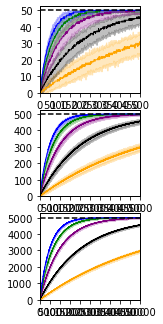

In [23]:
##Make simulation plots containing confidence interval bands
plt.rcParams['axes.linewidth'] = 1 #set the value globally

#specify which target mutant count to plot
mutant_totals=[50,500,5000]

#list single mutant frequencies simulated
percent_list=[0.1,0.25,0.5, 0.75, 1.0]

#colors & labels for each single mutant frequency
colors=['orange','black','purple','green','blue']
labels=['0.10','0.25','0.50','0.75','1.00']

#make fig, ax
fig, ax = plt.subplots(3,figsize=(1.8,5.4))

for index, val in enumerate(mutant_totals):
    current_ax=plt.subplot(3,1,index+1)
    total_mutants=val
    
    #for larger simulations, reduce number of plotted points to allow easier manipulation of plots outside of pythong
    if val > 50:
        
        #want to keep all simulations to 500 plotted points, so define bins for different number of draws below
        bins=int(val/val)
        
        
        #slice all arrays below to select every nth element only, defined by bins above
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df.loc[(sim_results_df['percent'] == i) & (sim_results_df['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=(data_select['num_draws'].to_numpy())[::bins]

            #get list of median unique mutants
            medians = (data_select['median_unique_mutants'].to_numpy())[::bins]

            #get list of lower CI values
            lowers = (data_select['lower_CI'].to_numpy())[::bins]

            #get list of upper CI values
            uppers = (data_select['upper_CI'].to_numpy())[::bins]

            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h], rasterized=True)
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid', rasterized=True)
    else:
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df.loc[(sim_results_df['percent'] == i) & (sim_results_df['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=data_select['num_draws'].to_numpy()

            #get list of median unique mutants
            medians = data_select['median_unique_mutants'].to_numpy()

            #get list of lower CI values
            lowers = data_select['lower_CI'].to_numpy()

            #get list of upper CI values
            uppers = data_select['upper_CI'].to_numpy()


            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h])
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid')

    current_ax.axhline(total_mutants, color ='black', linestyle='--')
    plt.xlim(0,total_mutants*10)
    plt.ylim(0,total_mutants+(total_mutants*0.05))
    plt.locator_params(nbins=10)

plt.subplots_adjust(hspace=0.2)

# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies.png')
# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies.pdf', dpi=400)

In [33]:
len(medians)

50000

## 2. Simulate actual experiment: SpAP library of 541 variants with 13*384 clones (Fig 4B)

In [215]:
numReps=100
successPercents=[0.1,0.25,0.5,0.75,1]
num_mutants=[541]
num_draws=[6000] #actual value here is 4992, but want to plot beyond this on x axis
sim_results = []

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        for i in rangeDraws:

            #Make numpy array containing random percents
            #make number of arrays (equal to number of reps) of length equal to numsber of draws
            successPercent = np.random.randint(1, 101, (numReps, i), dtype=int) 

            target_mutants = successPercent<(percent*100)


            unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=False).tolist() for num_mutants in np.sum(target_mutants, 1).tolist()]
            num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

            output_results = {'percent': percent,
                              'target_mutant_count': mutant_count,
                              'num_draws': i, 
                              'median_unique_mutants': np.median(num_unique_mutants), 
                              'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                              'upper_CI':np.quantile(num_unique_mutants, 0.975)
                             }
            #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
            sim_results.append(output_results)
            
sim_results_df_SpAP=pd.DataFrame(sim_results)

100%|██████████| 5/5 [06:42<00:00, 80.54s/it]


In [217]:
#export simulation results for 100 replicates to load again later
sim_results_df_SpAP.to_csv('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_B_picking_with_efficiencies_100reps.csv')

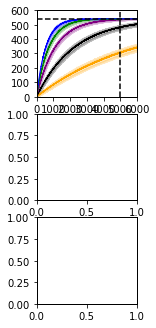

In [219]:
##Make simulation plots containing confidence interval bands
plt.rcParams['axes.linewidth'] = 1 #set the value globally

#specify which target mutant count to plot
mutant_totals=[541]

#list single mutant frequencies simulated
percent_list=[0.1,0.25,0.5, 0.75, 1.0]

#colors & labels for each single mutant frequency
colors=['orange','black','purple','green','blue']
labels=['0.10','0.25','0.50','0.75','1.00']

#make fig, ax
fig, ax = plt.subplots(3,figsize=(1.8,5.4))

for index, val in enumerate(mutant_totals):
    current_ax=plt.subplot(3,1,index+1)
    total_mutants=val
    
    #for larger simulations, reduce number of plotted points to allow easier manipulation of plots outside of pythong
    if val > 50:
        
        #want to keep all simulations to 500 plotted points, so define bins for different number of draws below
        bins=int(val/val)
        
        
        #slice all arrays below to select every nth element only, defined by bins above
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df_SpAP.loc[(sim_results_df_SpAP['percent'] == i) & (sim_results_df_SpAP['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=(data_select['num_draws'].to_numpy())[::bins]

            #get list of median unique mutants
            medians = (data_select['median_unique_mutants'].to_numpy())[::bins]

            #get list of lower CI values
            lowers = (data_select['lower_CI'].to_numpy())[::bins]

            #get list of upper CI values
            uppers = (data_select['upper_CI'].to_numpy())[::bins]

            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h], rasterized=True)
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid', rasterized=True)
    else:
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df_SpAP.loc[(sim_results_df_SpAP['percent'] == i) & (sim_results_df_SpAP['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=data_select['num_draws'].to_numpy()

            #get list of median unique mutants
            medians = data_select['median_unique_mutants'].to_numpy()

            #get list of lower CI values
            lowers = data_select['lower_CI'].to_numpy()

            #get list of upper CI values
            uppers = data_select['upper_CI'].to_numpy()


            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h])
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid')

    current_ax.axhline(total_mutants, color ='black', linestyle='--')
    current_ax.axvline(4992, color ='black', linestyle='--')

    plt.xlim(0,6000)
    plt.ylim(0,600)
    plt.locator_params(nbins=10)

plt.subplots_adjust(hspace=0.2)

fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_B_picking_with_efficiencies.png')
fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_B_picking_with_efficiencies.pdf', dpi=400)

## Fig 4C, number of variants expected (histogram) for desired mutants, number of draws, and specified efficiency

In [123]:
numReps=1000
successPercents=[0.5]
num_mutants=[50]
num_draws=[384] 
sim_results = []

mutant_yield=[]

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        for i in rangeDraws:

            #Make numpy array containing random percents
            #make number of arrays (equal to number of reps) of length equal to numsber of draws
            successPercent = np.random.randint(1, 101, (numReps, i), dtype=int) 

            target_mutants = successPercent<(percent*100)


            unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=False).tolist() for num_mutants in np.sum(target_mutants, 1).tolist()]
            num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

            output_results = {'percent': percent,
                              'target_mutant_count': mutant_count,
                              'num_draws': i, 
                              'median_unique_mutants': np.median(num_unique_mutants), 
                              'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                              'upper_CI':np.quantile(num_unique_mutants, 0.975)
                             }
            #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
            sim_results.append(output_results)
            
            #When 384 draws are reached for each replicate, add number of unique mutants to a list for a histogram
            
            if i == rangeDraws[-1]:
                mutant_yield.append(num_unique_mutants)
            
            
sim_results_df_SpAP=pd.DataFrame(sim_results)

100%|██████████| 1/1 [00:08<00:00,  8.83s/it]


In [124]:
sim_results_df_SpAP

,percent,target_mutant_count,num_draws,median_unique_mutants,lower_CI,upper_CI
0,0.5,50,1,1.0,0.0,1.0
1,0.5,50,2,1.0,0.0,2.0
2,0.5,50,3,1.0,0.0,3.0
3,0.5,50,4,2.0,0.0,4.0
4,0.5,50,5,2.0,0.0,4.0
...,...,...,...,...,...,...
379,0.5,50,380,49.0,46.0,50.0
380,0.5,50,381,49.0,46.0,50.0
381,0.5,50,382,49.0,47.0,50.0
382,0.5,50,383,49.0,46.0,50.0


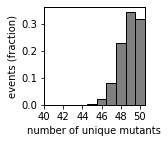

In [127]:
#plot histogram, 1000 events =1000
plt.rcParams['axes.linewidth'] = 1 #set the value globally
fig, ax = plt.subplots(1,figsize=(1.8,1.8))
plt.hist(mutant_yield, bins=np.arange(-39.5, 51.5, 1), color = 'gray', rwidth=1, edgecolor='black', density=True)
plt.xlim(40,50.5)
plt.xticks(np.arange(40, 52, step=2));
# plt.yticks(0,0.25)
plt.xlabel('number of unique mutants');
plt.ylabel('events (fraction)');
plt.show()

# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_C_var_per_384_run_pt5_1000reps.png')
# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_C_var_per_384_run_pt5_1000reps.pdf')

## Fig 4E, expected number of variants per position, a 50 AA window sampled 384 draws at 0.5 efficiency, 1000 replicates --REDO

In [129]:
numReps=1000
successPercents=[0.5]
num_mutants=[50]
num_draws=[384] 
sim_results = []

mutant_yield=[]
unique_mutants = []

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]

        #Make numpy array containing random percents
        #make number of arrays (equal to number of reps) of length equal to numsber of draws
        successPercent = np.random.randint(1, 101, (numReps, numWellsSequenced), dtype=int) 

        target_mutants = successPercent<(percent*100)


        unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=True) for num_mutants in np.sum(target_mutants, 1)]

        num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

        output_results = {'percent': percent,
                          'target_mutant_count': mutant_count,
                          'num_draws': i, 
                          'median_unique_mutants': np.median(num_unique_mutants), 
                          'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                          'upper_CI':np.quantile(num_unique_mutants, 0.975)
                         }
        #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
        sim_results.append(output_results)

        #When 384 draws are reached for each replicate, add number of unique mutants to a list for a histogram


        mutant_yield.append(num_unique_mutants)

            
sim_results_df_SpAP=pd.DataFrame(sim_results)

100%|██████████| 1/1 [00:00<00:00, 17.29it/s]


50000


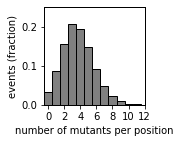

In [136]:
list_of_freqs=[]
for i, j in unique_mutants:
    freqs=list(j)
    if len(freqs) < 50:
        freqs_zero= [*freqs, *((50-len(freqs))*[0])]
    list_of_freqs.extend(freqs_zero)

print(len(list_of_freqs))
#plot histogram, 1000 events =1000
plt.rcParams['axes.linewidth'] = 1 #set the value globally
fig, ax = plt.subplots(1,figsize=(1.8,1.8))
plt.hist(list_of_freqs, bins=np.arange(-0.5, 12, 1), color = 'gray', rwidth=1, edgecolor='black', density=True)
plt.xlim(-0.5,12)
plt.ylim(0,0.25)
plt.xticks(np.arange(0, 14, step=2));
# plt.yticks(np.arange(0, 1250, step=250));
plt.xlabel('number of mutants per position');
plt.ylabel('events (fraction)');

plt.show()

# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_E_var_per_pos_run_pt5_1000_reps.png')
# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_E_var_per_pos_run_pt5_1000_reps.pdf')

In [135]:
print('median_freq: ', np.median(list_of_freqs) )
print('lowerCI: ', np.quantile(list_of_freqs, 0.025))
print('upperCI: ', np.quantile(list_of_freqs, 0.975))




#                               'lower_CI':np.quantile(list_of_freqs, 0.025), 
#                               'upper_CI':np.quantile(list_of_freqs, 0.975)

median_freq:  4.0
lowerCI:  0.0
upperCI:  8.0


<BarContainer object of 0 artists>

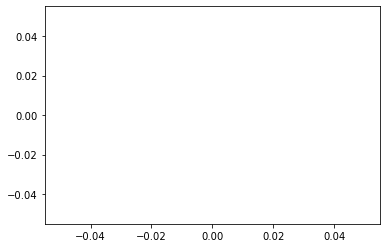

In [14]:

plt.bar(*np.unique(np.array(list_of_freqs), return_counts=True))



## Fig 4D, expected number of variants per position, a 50 AA window sampled 384 draws at 0.5 efficiency, show 5 sample runs --REDO

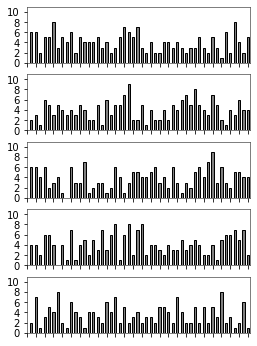

In [553]:
# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 384
efficiency=50

# create a list with each position
mutA = np.arange(1,numMutsWanted+1)
rangeDraws = np.arange(1,numWellsSequenced+1)

numPlots=np.arange(0,5)

fig, ax = plt.subplots(nrows=5,ncols=1, sharex=True,figsize=(4,6))
plt.rcParams['axes.linewidth'] = 0.5 #set the value globally



for i in numPlots:
    current_ax=plt.subplot(5,1,i+1)
    # create a list to hold the number of unique mutants we get each time we run the simulation
    chosenMut = []
    
    for a in rangeDraws:
    # let's simulate a step where we only get a mutant 60 percent of the time!
        successPercent = random.choice(percentA)
        if successPercent <= efficiency:
            chosenMut.append(random.choice(mutA))
        else:
            pass

    countedMuts=np.unique(chosenMut, return_counts=True)
    current_ax.bar(countedMuts[0], countedMuts[1], width=0.5,color='gray', edgecolor='black')
    
    plt.xlim(0,50.5, 5)
    plt.ylim(0,11)
    plt.xticks(np.arange(0, 51, step=2));
    plt.yticks(np.arange(0, 12, step=2));
    current_ax.xaxis.set_ticklabels([])
plt.subplots_adjust(hspace=0.2)
plt.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_D_bar_chart_positions.png')
plt.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_D_bar_chart_positions.pdf')
plt.show()

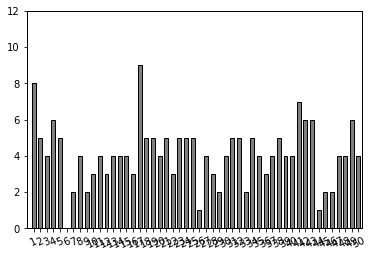

In [495]:
plt.bar(countedMuts[0], countedMuts[1], width=0.6,color='gray', edgecolor='black')
plt.xlim(0,50.5, 5)
plt.ylim(0,12,2)
plt.xticks(np.arange(1,51,1), rotation=25);

# plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/sample_dist_1eq.pdf')
# plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/sample_dist_1eq.png')



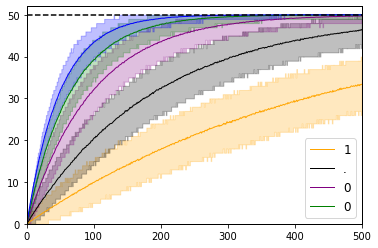

In [177]:
plt.rcParams['axes.linewidth'] = 1 #set the value globally


simList=[allMutants10,allMutants25,allMutants50,allMutants75,allMutants100]
colors=['orange','black','purple','green','blue']
labels=['0.10','0.25','0.50','0.75','1.00']
fig, ax = plt.subplots()


for index, item in enumerate(simList):
    allSim=np.array(item)
    meanArray=[np.mean(k) for k in zip(*allSim)]
    bottom=np.quantile(allSim, 0.025, axis=0)
    top=np.quantile(allSim, 0.975, axis=0)
    ax.plot(numDraws, meanArray, '-o', marker="None",linewidth=1, color=colors[index])
    ax.fill_between(numDraws, meanArray-(meanArray - bottom), meanArray+(top - meanArray), color=colors[index],alpha=0.25, step='mid')
    ax.legend(labels[index], fontsize=12)

ax.axhline(50, color ='black', linestyle='--')

plt.xlim(0,500)
plt.ylim(0,52)

fig.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/'+'RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_Wells_10_25_50_75_100_PercentMutant1000_bands.pdf')
fig.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/'+'RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_Wells_10_25_50_75_100_PercentMutant1000_bands.png')


In [158]:
## try smoothing confidence bands

(0, 52)

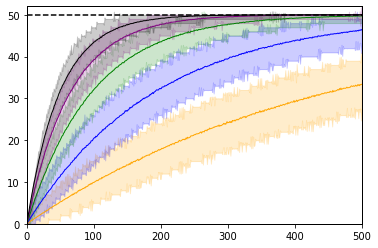

In [157]:
plt.rcParams['axes.linewidth'] = 1 #set the value globally


simList=[allMutants10,allMutants25,allMutants50,allMutants75,allMutants100]
colors=['orange','blue','green','purple','black']
fig, ax = plt.subplots()


for index, item in enumerate(simList):
    allSim=np.array(item)
    meanArray=[np.mean(k) for k in zip(*allSim)]
    bottom=np.quantile(allSim, 0.025, axis=0)
    smoothed_bottom = interpolate.splrep(numDraws, bottom)
    top=np.quantile(allSim, 0.975, axis=0)
    smoothed_top = interpolate.splrep(numDraws, top)
    ax.plot(numDraws, meanArray, '-o', marker="None",linewidth=1, color=colors[index])
    ax.fill_between(numDraws, meanArray-(meanArray - ((smoothed_bottom[1])[0:500])), meanArray+((smoothed_top[1][0:500]) - meanArray), color=colors[index],alpha=0.2, interpolate=True)


ax.axhline(50, color ='black', linestyle='--')

plt.xlim(0,500)
plt.ylim(0,52)

/home/mason/.conda/envs/orthologs/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


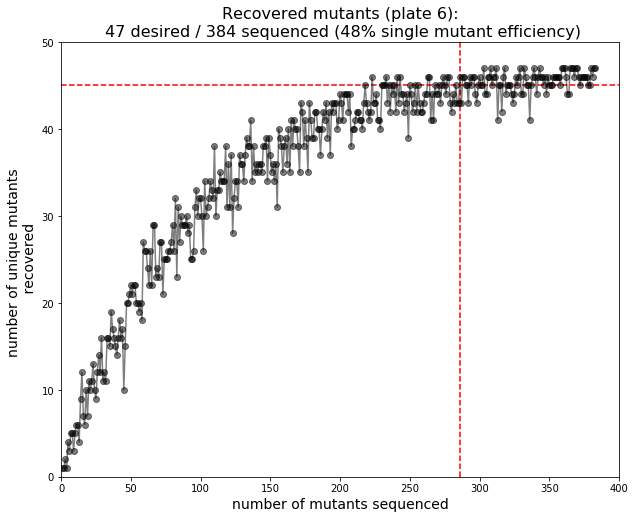

In [93]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 47
numWellsSequenced = 384
efficiency=48
percentA = np.arange(0,100)

# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced)

for a in rangeDraws:
    chosenMut = []
    for b in range(0,a):
        # let's simulate a step where we only get a mutant 60 percent of the time!
        successPercent = random.choice(percentA)
        if successPercent <= efficiency:
            chosenMut.append(random.choice(mutA))
        else:
            pass
    numMutants.append(len(set(chosenMut)))
    numDraws.append(a)

fig = plt.figure(figsize=(10,8))
plt.xlim(0,400)
plt.ylim(top=50)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,numMutants,fmt='-o',color='k',alpha=0.5)

# plt.axhline(y=40, color='black', linestyle='--')
plt.axhline(y=45, color='red', linestyle='--')
plt.axvline(x=286, color='red', linestyle='--')


ax.set_xlabel('number of mutants sequenced', fontsize=14)
ax.set_ylabel('number of unique mutants \n recovered',fontsize=14)
ax.set_title('Recovered mutants (plate 6):\n '+str(numMutsWanted)+' desired / '+str(numWellsSequenced)+' sequenced ('+str(efficiency)+'% single mutant efficiency)', fontsize=16)


# now let's save the figure where we put the information about what we did in the filename
fig.savefig('/home/mason/Desktop/2020_spap_val_seq/workup_results/mutant_calling/select_picking_simulation plots/dif_format/'+'RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced_'+str(efficiency)+'PercentMutant_observed_added_plate6_var.png')
# fig.savefig('RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced_60PercentMutant.eps')

/home/mason/.conda/envs/orthologs/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


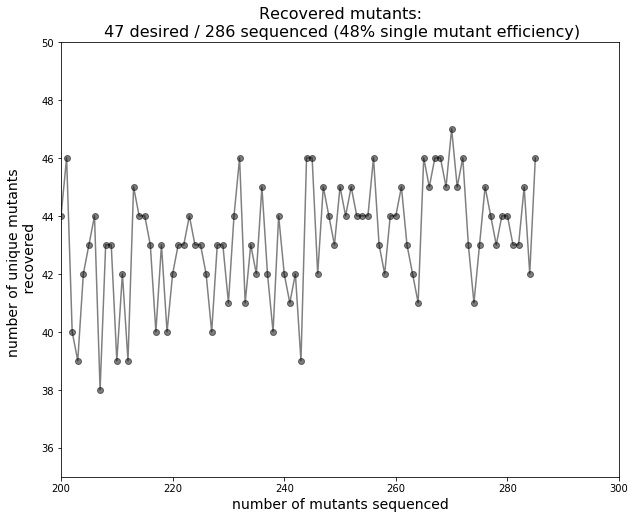

In [103]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 47
numWellsSequenced = 286
efficiency=48
percentA = np.arange(0,100)

# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced)

for a in rangeDraws:
    chosenMut = []
    for b in range(0,a):
        # let's simulate a step where we only get a mutant 60 percent of the time!
        successPercent = random.choice(percentA)
        if successPercent <= efficiency:
            chosenMut.append(random.choice(mutA))
        else:
            pass
    numMutants.append(len(set(chosenMut)))
    numDraws.append(a)

fig = plt.figure(figsize=(10,8))
plt.xlim(200,300)
plt.ylim(35,50)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,numMutants,fmt='-o',color='k',alpha=0.5)
ax.set_xlabel('number of mutants sequenced', fontsize=14)
ax.set_ylabel('number of unique mutants \n recovered',fontsize=14)
ax.set_title('Recovered mutants:\n '+str(numMutsWanted)+' desired / '+str(numWellsSequenced)+' sequenced ('+str(efficiency)+'% single mutant efficiency)', fontsize=16)


# now let's save the figure where we put the information about what we did in the filename
fig.savefig('/home/mason/Desktop/2020_spap_val_seq/workup_results/mutant_calling/select_picking_simulation plots/'+'zoom_RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced_'+str(efficiency)+'PercentMutant.png')
# fig.savefig('RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_WellsSequenced_60PercentMutant.eps')

In [457]:
fig = plt.figure(figsize=(12,8))
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 384
efficiency=50
percentA = np.arange(0,100)

# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced)


# do it 500 times:
for i in range(0,10):
    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)

    if i == 0:
        A = np.array(numCountedByPosition)
    else:
        A = np.vstack([A,numCountedByPosition])
        
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.hist(np.ndarray.flatten(A),bins=10,range=(0,10),color='0.5',edgecolor='k');
ax.set_xticks([i + 0.5 for i in np.arange(0,10)]);
ax.set_xticklabels(np.arange(0,10));
ax.set_xlabel('# mutations at a given position')
ax.set_ylabel('# number of events')
ax.set_title('Distribution of mutant frequencies: simulation of 50 runs (48 mutants/96 picks)', fontsize=12)

        


NameError: name 'numCountedByPosition' is not defined

<Figure size 864x576 with 0 Axes>

In [127]:
A

array([[4, 1, 1, ..., 2, 2, 1],
       [4, 1, 1, ..., 2, 2, 1],
       [4, 1, 1, ..., 2, 2, 1],
       ...,
       [4, 1, 1, ..., 2, 2, 1],
       [4, 1, 1, ..., 2, 2, 1],
       [4, 1, 1, ..., 2, 2, 1]])

Text(0.5, 1.0, 'Distribution of mutant frequencies: simulation of 50 runs (48 mutants/96 picks)')

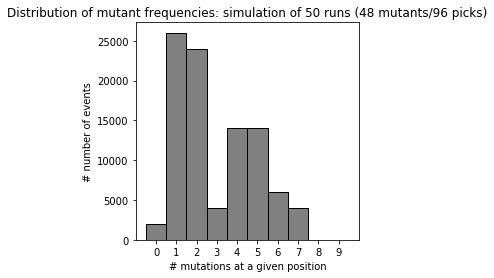

In [126]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.hist(np.ndarray.flatten(A),bins=10,range=(0,10),color='0.5',edgecolor='k');
ax.set_xticks([i + 0.5 for i in np.arange(0,10)]);
ax.set_xticklabels(np.arange(0,10));
ax.set_xlabel('# mutations at a given position')
ax.set_ylabel('# number of events')
ax.set_title('Distribution of mutant frequencies: simulation of 2000 runs (48 mutants/96 picks)', fontsize=12)

# Match simulations with observed data


In [18]:
#import summary stats
mutantDF=pd.read_csv('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/mutant_calling/mutant_calling_summary_stat_csvs/plates_1-14_mutant_stats.csv')


mutantDF_100=pd.read_csv('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/mutant_calling/mutant_calling_csvs_RATIO>100/plates_1-14_mutant_stats.csv')


In [19]:
mutantDF_100

,Unnamed: 0,plate_num,window_num,total_BCs,BCs_processed,BCs_w_min_cov,unique_indels_min_cov,Num_of_BCs_nonIndels_min_cov,num_WT_min_cov,num_singles_min_cov,num_doubles_min_cov,num_triples_plus_min_cov,num_pos_desired_total,num_pos_cov_singles,num_pos_cov_all,ratio_singles_to_all
0,0,1,1,384,215,185,28,176,39,90,38,9,40,35,39,0.49
1,0,2,2,384,285,199,10,197,22,98,54,23,48,46,48,0.49
2,0,3,3,384,254,220,22,214,21,106,60,27,48,40,47,0.48
3,0,4,4,384,241,123,10,119,14,62,30,13,48,34,44,0.50
4,0,5,5,384,259,232,22,230,19,127,73,11,47,43,46,0.55
5,0,6,6,384,269,165,16,162,19,98,36,9,47,40,42,0.59
6,0,7,7,384,309,215,10,213,40,119,46,8,47,37,42,0.55
7,0,8,8,384,350,128,9,127,20,66,28,13,46,26,31,0.52
8,0,9,9,384,273,192,20,185,23,91,53,18,46,32,43,0.47
9,0,10,11,384,299,267,12,264,17,132,76,39,43,39,42,0.49


In [20]:
# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 40
numWellsSequenced = 185
efficiency=49
percentA = np.arange(0,100)


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced+1,1)

numReps=1000

allMutants25=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants25.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants25]
allMean=[np.mean(k) for k in zip(*arrays)]

In [35]:
predict_list=[]
top_list=[]
bottom_list=[]

for index, val in mutantDF_100.iterrows():

    # here is where the user can input the number of mutants
    # and the number of wells to sequence
    numMutsWanted = val.num_pos_desired_total
    numWellsSequenced = int(val.BCs_w_min_cov)
    efficiency=val.ratio_singles_to_all*100
    percentA = np.arange(0,100)


    # now this is just what we did before but using those inputs
    mutA = np.arange(0,numMutsWanted)
    numMutants,numDraws = [],[]
    rangeDraws = np.arange(1,numWellsSequenced+1,1)

    numReps=1000

    allMutants25=[]

    for i in np.arange(1,numReps+1):

        numMutants,numDraws = [],[]


        for a in rangeDraws:
            chosenMut = []
            for b in range(0,a):
                # let's simulate a step where we only get a mutant 60 percent of the time!
                successPercent = random.choice(percentA)
                if successPercent <= efficiency:
                    chosenMut.append(random.choice(mutA))
                else:
                    pass
            numMutants.append(len(set(chosenMut)))
            numDraws.append(a)
        allMutants25.append(numMutants)
    
    allSim=np.array(allMutants25)
    meanArray=[np.mean(k) for k in zip(*allSim)]
    predict_list.append(meanArray[-1])
    
    top=np.quantile(allSim, 0.975, axis=0)
    top_list.append(top[-1])

    bottom=np.quantile(allSim, 0.025, axis=0)
    bottom_list.append(bottom[-1])
#     break
    
    
mutantDF_100['predicted_unique']=predict_list
mutantDF_100['predicted_top']=top_list
mutantDF_100['predicted_bottom']=bottom_list

In [37]:
mutantDF_100.to_csv('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/mutantDF_100_ratio_with_preds.csv')

In [26]:
allSim=np.array(allMutants25)
meanArray=[np.mean(k) for k in zip(*allSim)]
bottom=np.quantile(allSim, 0.025, axis=0)
top=np.quantile(allSim, 0.975, axis=0)
    
    
print(meanArray[-1])
print(bottom[-1])
print(top[-1])

36.139
32.0
39.0


In [ ]:

#make fig here
fig = plt.figure(figsize=(6,6))
# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 500
efficiency=25
percentA = np.arange(0,100)




# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced+1,1)

numReps=1000

allMutants25=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants25.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants25]
allMean=[np.mean(k) for k in zip(*arrays)]
plt.xlim(0,500)
plt.ylim(top=60)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,allMean,fmt='-o',color='purple',alpha=0.5)


efficiency=50
percentA = np.arange(0,100)




# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

numReps=1000

allMutants50=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants50.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants50]
allMean=[np.mean(k) for k in zip(*arrays)]

plt.xlim(0,500)
plt.ylim(top=60)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,allMean,fmt='-o',color='green',alpha=0.5)








efficiency=75
percentA = np.arange(0,100)




# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

numReps=1000

allMutants75=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants75.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants75]
allMean=[np.mean(k) for k in zip(*arrays)]

plt.xlim(0,500)
plt.ylim(top=60)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,allMean,fmt='-o',color='blue',alpha=0.5)

efficiency=10
percentA = np.arange(0,100)




# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

numReps=1000

allMutants10=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants10.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants10]
allMean=[np.mean(k) for k in zip(*arrays)]
plt.xlim(0,500)
plt.ylim(top=60)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,allMean,fmt='-o',color='orange',alpha=0.5)





###################################################################################################3

efficiency=100
percentA = np.arange(0,100)




# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
# rangeDraws = np.arange(1,numWellsSequenced)

numReps=1000

allMutants100=[]

for i in np.arange(1,numReps+1):
    
    numMutants,numDraws = [],[]


    for a in rangeDraws:
        chosenMut = []
        for b in range(0,a):
            # let's simulate a step where we only get a mutant 60 percent of the time!
            successPercent = random.choice(percentA)
            if successPercent <= efficiency:
                chosenMut.append(random.choice(mutA))
            else:
                pass
        numMutants.append(len(set(chosenMut)))
        numDraws.append(a)
    allMutants100.append(numMutants)
    
    
arrays = [np.array(x) for x in allMutants100]
allMean=[np.mean(k) for k in zip(*arrays)]

plt.xlim(0,500)
plt.ylim(top=52)
ax = fig.add_subplot(111)
ax.errorbar(numDraws,allMean,fmt='-o',color='black',alpha=0.5)






# plt.axhline(y=47, color='black', linestyle='--')

# plt.axhline(y=44.65, color='red', linestyle='--')






plt.legend()



ax.set_xlabel('number of mutants sequenced', fontsize=14)
ax.set_ylabel('number of unique mutants \n recovered',fontsize=14)
ax.set_title('Recovered mutants:\n '+str(numMutsWanted)+' desired / '+str(numWellsSequenced)+' sequenced (10, 25,50,75, 100% single mutant efficiency)', fontsize=16)


# now let's save the figure where we put the information about what we did in the filename
# fig.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/'+'RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_Wells_10_25_50_75_100_PercentMutant1000.eps')
# fig.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/'+'RecoveredMutants_'+str(numMutsWanted)+'MutsWanted_'+str(numWellsSequenced)+'_Wells_10_25_50_75_100_PercentMutant1000.png')


# Let's not worry about the success rate and let's just consider the distribution of mutants per position WITHOUT worrying about that


Text(0, 0.5, 'number of unique mutants recovered')

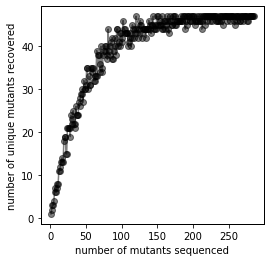

In [180]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 47
numWellsSequenced = 286


# now this is just what we did before but using those inputs
mutA = np.arange(0,numMutsWanted)
numMutants,numDraws = [],[]
rangeDraws = np.arange(1,numWellsSequenced)

for a in rangeDraws:
    chosenMut = []
    for b in range(0,a):
        chosenMut.append(random.choice(mutA))
    numMutants.append(len(set(chosenMut)))
    numDraws.append(a)


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111)
ax.errorbar(numDraws,numMutants,fmt='-o',color='k',alpha=0.5)
ax.set_xlabel('number of mutants sequenced')
ax.set_ylabel('number of unique mutants recovered')


Text(0.5, 1.0, 'expected distribution')

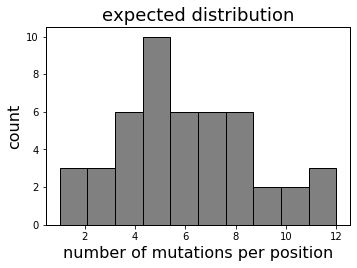

In [182]:
fig = plt.figure(figsize=(12,8))
numCountedByPosition = []
for a in mutA:
    numCountedByPosition.append(chosenMut.count(a))
# ax = fig.add_subplot(211)
# sns.barplot(mutA,numCountedByPosition,color='0.5')
ax.set_xticks(mutA)
ax.set_xticklabels(mutA,rotation=90);



ax = fig.add_subplot(223)
ax.hist(numCountedByPosition,color='0.5',edgecolor='k')
plt.ylabel('count',fontsize=16)
plt.xlabel('number of mutations per position',fontsize=16)
plt.title('expected distribution', fontsize=18)




# fig.tight_layout()

# OK, now let's just simulate the distribution of mutants we expect to see for 48 mutants and 48 draws

In [201]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 50
efficiency=100

# create a list with each position
mutA = np.arange(1,numMutsWanted+1)
rangeDraws = np.arange(1,numWellsSequenced)

# create a list to hold the number of unique mutants we get each time we run the simulation
numMutants = []

for a in rangeDraws:
    chosenMut = []
    for b in range(0,a):
        # let's simulate a step where we only get a mutant 60 percent of the time!
        successPercent = random.choice(percentA)
        if successPercent <= efficiency:
            chosenMut.append(random.choice(mutA))
        else:
            pass
    numMutants.append(len(set(chosenMut)))
    numDraws.append(a)





# do it 50 times:
# for i in range(0,1000):
#     for a in rangeDraws:
#         chosenMut = []
#         for b in range(0,a):
#             # let's simulate a step where we only get a mutant 60 percent of the time!
#             successPercent = random.choice(percentA)
#             if successPercent <= efficiency:
#                 chosenMut.append(random.choice(mutA))
#             else:
#                 pass
#         numMutants.append(len(set(chosenMut)))
#         numDraws.append(a)
# #     for a in mutA:
# #         numCountedByPosition.append(chosenMut.count(a))
#     if i == 0:
#         A = np.array(numCountedByPosition)
#     else:
#         A = np.vstack([A,numCountedByPosition])


In [476]:
# let's see if we can do this again 

# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 384
efficiency=50

# create a list with each position
mutA = np.arange(1,numMutsWanted+1)
rangeDraws = np.arange(1,numWellsSequenced+1)

# create a list to hold the number of unique mutants we get each time we run the simulation
chosenMut = []

for a in rangeDraws:
# let's simulate a step where we only get a mutant 60 percent of the time!
    successPercent = random.choice(percentA)
    if successPercent <= efficiency:
        chosenMut.append(random.choice(mutA))
    else:
        pass

countedMuts=np.unique(chosenMut, return_counts=True)
countedMuts

204


(array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([8, 5, 4, 6, 5, 2, 4, 2, 3, 4, 3, 4, 4, 4, 3, 9, 5, 5, 4, 5, 3, 5,
        5, 5, 1, 4, 3, 2, 4, 5, 5, 2, 5, 4, 3, 4, 5, 4, 4, 7, 6, 6, 1, 2,
        2, 4, 4, 6, 4]))

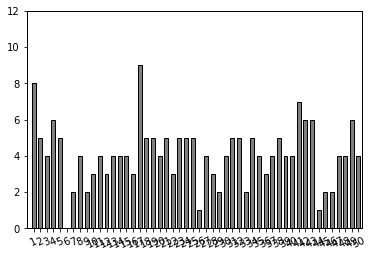

In [495]:
plt.bar(countedMuts[0], countedMuts[1], width=0.6,color='gray', edgecolor='black')
plt.xlim(0,50.5, 5)
plt.ylim(0,12,2)
plt.xticks(np.arange(1,51,1), rotation=25);

# plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/sample_dist_1eq.pdf')
# plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/2021_simulations/sample_dist_1eq.png')



Text(0.5, 1.0, 'Simulation of unique mutants recovered (48 desired/384 sequenced) for 100 events')

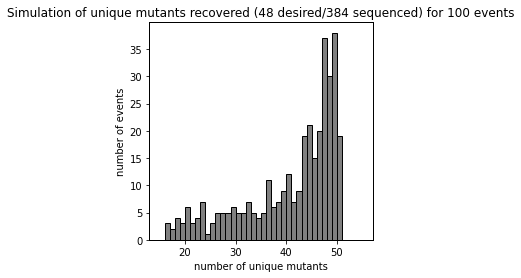

In [478]:
# now let's plot the distribution of mutants I might expect to see for 48 mutants and 48 draws

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.hist(numMutants,color='0.5',edgecolor='k',bins=40,range=(15,55));
ax.set_xlabel('number of unique mutants')
ax.set_ylabel('number of events')
ax.set_title('Simulation of unique mutants recovered (48 desired/384 sequenced) for 100 events', fontsize=12)

# fig.tight_layout()
# fig.savefig('distributionOfUniqueMutants_48Mutants48Draws.png')
# fig.savefig('distributionOfUniqueMutants_48Mutants48Draws.eps')

Text(0.5, 1.0, 'Distribution of mutant frequencies: simulation of 1000 runs (47 mutants desired/286 picks)')

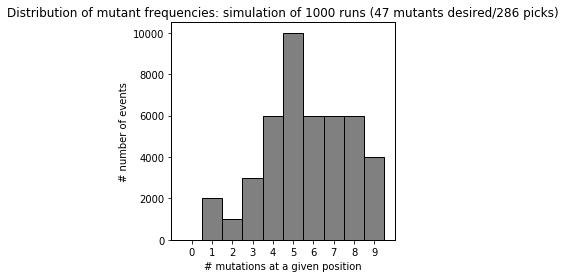

In [194]:
# now let's plot the dstribution of the number of mutations I might see at each position

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.hist(np.ndarray.flatten(A),bins=10,range=(0,10),color='0.5',edgecolor='k');
ax.set_xticks([i + 0.5 for i in np.arange(0,10)]);
ax.set_xticklabels(np.arange(0,10));
ax.set_xlabel('# mutations at a given position')
ax.set_ylabel('# number of events')
ax.set_title('Distribution of mutant frequencies: simulation of 1000 runs (47 mutants desired/286 picks)', fontsize=12)

# fig.tight_layout()
# fig.savefig('distributionOfNumMutationsAtAGivenPosition.png')
# fig.savefig('distributionOfNumMutationsAtAGivenPosition.eps')

ValueError: Grouper and axis must be same length

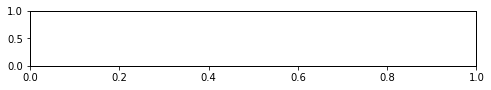

In [197]:
# and now let's just plot the # mutations per position for the first 10 draws to give a sense 
# of what this looks like!

fig = plt.figure(figsize=(8,12))

for a in range(0,10):
    ax = fig.add_subplot(10,1,a+1)
    sns.barplot(mutA,A[a,:],color='0.5',edgecolor='k')
    ax.set_ylim(0,6)
    ax.set_ylabel('# muts')
    if a != 9:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('residue position')
fig.tight_layout()
# fig.savefig('mutationsPerPosition_48Mutants48Draws_Showing10Draws.png')
# fig.savefig('mutationsPerPosition_48Mutants48Draws_Showing10Draws.eps')

In [31]:
concentrations=pd.read_csv("/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/Plate_1.csv")
conc1=concentrations.replace(1000, 10)
conc1.columns = ['Library 1 ampure', 'Library 5 ampure', 'Library 1 dilute only','Library 5 dilute only','Plate 5']

Lib1_only=conc1[['Library 1 ampure','Library 1 dilute only']].copy()
Lib1_only

,Library 1 ampure,Library 1 dilute only
0,0.011,0.158
1,0.023,0.222
2,0.021,0.449
3,6.796,0.373
4,0.012,0.132
5,0.021,0.041
6,0.044,0.176
7,0.965,0.043
8,0.073,0.475
9,0.810,0.231


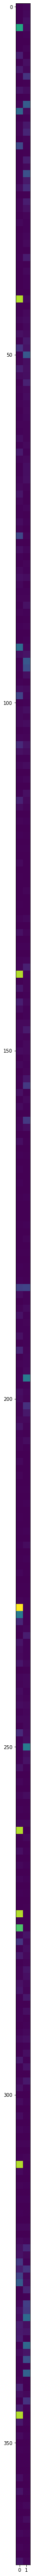

In [39]:
plt.figure(figsize=(100,100))

plt.imshow(Lib1_only,interpolation='nearest')
# plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/heatmap1.pdf')
plt.show()

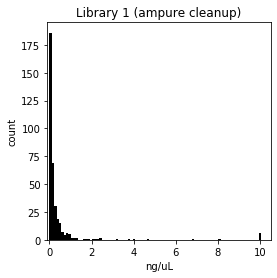

In [117]:
conc1['Library 1 ampure'].hist(bins=100, figsize=(4,4), color='black', grid=False)
plt.xlim(-0.1,10.5)
plt.title('Library 1 (ampure cleanup)')
plt.xlabel('ng/uL')
plt.ylabel('count')
plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/lib1_cleanup.pdf')

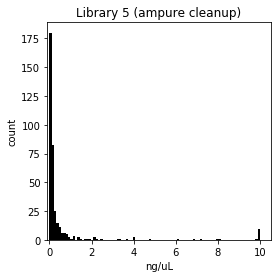

In [116]:
conc1['Library 5 ampure'].hist(bins=100, figsize=(4,4), color='black', grid=False)
plt.xlim(-0.1,10.5)
plt.title('Library 5 (ampure cleanup)')
plt.xlabel('ng/uL')
plt.ylabel('count')
plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/lib5_cleanup.pdf')

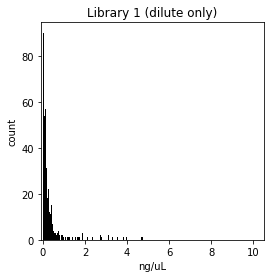

In [115]:
conc1['Library 1 dilute only'].hist(bins=100, figsize=(4,4), color='black', grid=False)
plt.xlim(-0.1,10.5)
plt.title('Library 1 (dilute only)')
plt.xlabel('ng/uL')
plt.ylabel('count')
plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/lib1_dil.pdf')

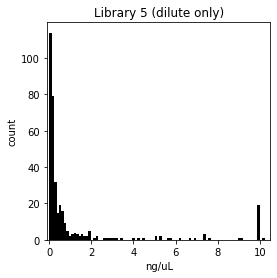

In [114]:
conc1['Library 5 dilute only'].hist(bins=100, figsize=(4,4), color='black', grid=False)
plt.xlim(-0.1,10.5)
plt.title('Library 5 (dilute only)')
plt.xlabel('ng/uL')
plt.ylabel('count')
plt.savefig('/home/mason/Desktop/Biohub_Sequencing_platform/Protocol_data/lib5_dil.pdf')

In [113]:
# lib5_dil=conc1['Library 5 dilute only'].copy()
# lib5_dil[lib5_dil>=0.05].count()
#lib 5 dilute: over=18, 0=16, 0.2 or over = 0.53, 0.05 or over = 0.92

lib5_clean=conc1['Library 5 ampure'].copy()
lib5_clean[lib5_clean<=0.005].count()/368
#lib 5 dilute: over=0.02, 0=0.04, 0.2 or over = 0.32, 0.05 or over = 0.75


# lib1_dil=conc1['Library 1 dilute only'].copy()
# (lib1_dil[lib1_dil<=0.001].count()-60)/368
# lib1_dil.value_counts(normalize=True)
#lib 1 dilute: over=0, 0=0.05, 0.2 or over = 0.44, 0.05 or over = 0.89


# lib1_clean=conc1['Library 1 ampure'].copy()
# (lib1_clean[lib1_clean>=10]).count()/308
# lib1_dil.value_counts(normalize=True)
#lib 1 dilute: over=0.02, 0=0.01, 0.2 or over = 0.39, 0.05 or over = 0.83

0.04076086956521739

In [ ]:
#lib 5 dilute: over=18, 0=16, 0.2 or over = 194~0.53, 0.05 or over = 0.92